# Analytical and numerical calculation of the order of approximation of a derivative calculated through finite differences (optional).

## 1 – The numerical test of the high-order formula

Implement the finite difference formula given by the first term on the right of Eq (5) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization)  into the program you developed for Exercise 1a and test if you get an approximation to the first derivative with an error that converges to zero like $(\Delta x)^4$.

Compare the 2nd-order and 4th-order error curves. Which error do you get in either case for 128 intervals? For 512 intervals? For 1024 intervals?

## 2 - Precision

Try for more than $10^6$ grid points. What do you see? What happens if you try for a lower or higher floating number? Numpy uses float 64 as default. Instead, use `np.float32` and `np.float128` (note: `np.float128` sometimes gives an error with `np.roll`!). Explain the error slopes. 

In [1]:
# Import libraries and define functions 
import numpy as np
import matplotlib.pyplot as plt 
from nm_lib import nm_lib as nm

def h(x): 
    """ 
    Solves the function h(x) from equation 1) 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        Spatial evolution of the function h(x) 
    """
    return np.cos(np.pi*(x-1) / 2) * np.exp(-((x-3) / 2.5)**2)

def dhp_analytical(x): 
    """ 
    Solves derivative of the function h(x) from equation 1) using the analytical 
    solution obtained from wolframalpha.com/ 

    Parameters
    ----------
    x : `array`
       Spatial axis. 
       
    Returns
    ------- 
    `array`
        The derivative of the function h(x) 
    """
    return np.exp(-0.16*(-3+x)**2)  *(1.5708*np.cos((np.pi*x)/2) - (-0.96 + 0.32*x) * np.sin((np.pi*x)/2))

def calc_error(x): 
    """ 
    Calculates the maximum of the absolute value of the error 
    Requires
    ----------
    Some spatial function hp_calc(x)

    Parameters 
    ----------
    x : `array`
        Spatial axis. 

    Returns
    -------
    error `array`
        The maximum of the abs error 
    """
    hp = nm.deriv_dnw(x, h(x))[:-1]
    hp_calc_ = dhp_analytical((x + (x[1]-x[0])/2)[:-1]) 

    # Take the difference between numerical and analytical derivatives 
    error = np.max(np.abs(hp_calc_ - hp))
    return error

In [2]:
nint =  [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 1e6, 3e6]

# 32 
error_list_32 = []
x0 = np.float32(-4.0)
xf = np.float32(10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list_32.append(np.float32(calc_error(np.float32(xx))))

# 64 
error_list_64 = []
x0 = (-4.0)
xf = (10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0

    error_list_64.append(calc_error(np.float64(xx)))

# 128 
error_list_128 = []
x0=np.float128(-4.0)
xf=np.float128(10.0)

for n in nint: 
    nump = n + 1
    xx = np.arange(nump)/(nump-np.float128(1.0)) * (xf-x0) + x0

    error_list_128.append(np.float128(calc_error(np.float128(xx))))

In [3]:
p_32  = np.poly1d(np.polyfit(np.log10(nint[:-6]), np.log10(error_list_32[:-6]), deg=1))
p_64  = np.poly1d(np.polyfit(np.log10(nint[:-4]), np.log10(error_list_64[:-4]), deg=1))
# p_128 = np.poly1d(np.polyfit(np.log10(nint[:-3]), np.log10(error_list_128[:-3]), deg=1)) # not supported in linalg

print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_32)/len(error_list_32) - p_32.coef[0]):.1e}")
print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_64)/len(error_list_64) - p_64.coef[0]):.1e}")
# print(f"Error of quadratic dependence: {np.abs(np.sum(error_list_128)/len(error_list_128) - p_128.coef[0]):.1e}")

Error of quadratic dependence: 1.9e+00
Error of quadratic dependence: 1.9e+00


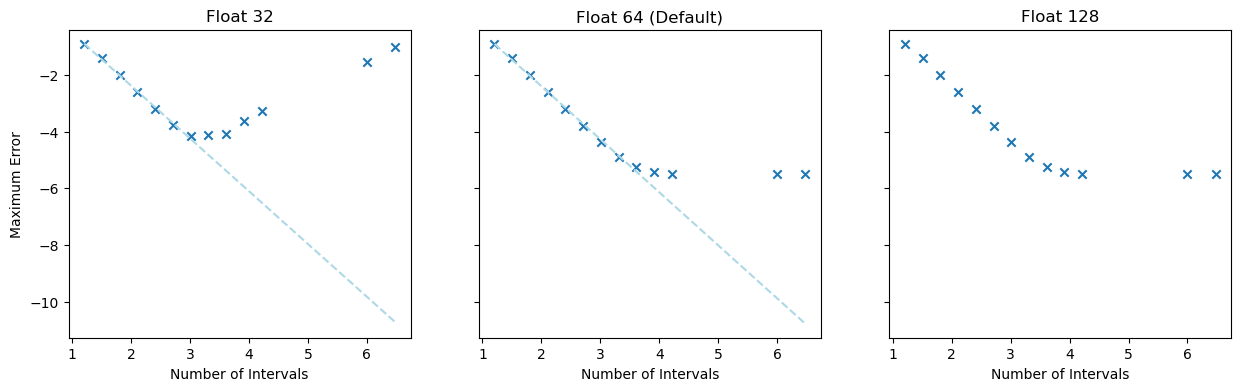

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

ax1.scatter(np.log10(nint), np.log10(np.float32(error_list_32)), marker='x')
ax1.plot(np.log10(nint), p_32(np.log10(nint)), color='lightblue', linestyle='--')
ax1.set_xlabel("Number of Intervals"); ax1.set_ylabel("Maximum Error")
ax1.title.set_text(f'Float 32')

ax2.scatter(np.log10(nint), np.log10(np.float64(error_list_64)), marker='x')
ax2.plot(np.log10(nint), p_64(np.log10(nint)), color='lightblue', linestyle='--')
ax2.set_xlabel("Number of Intervals")
ax2.title.set_text(f'Float 64 (Default)')
# ax2.set_xscale('log')

ax3.scatter(np.log10(nint), np.log10(np.float128(error_list_128)), marker='x')
# ax2.plot(np.log10(nint), p_128(np.log10(nint)), color='lightblue', linestyle='--')
ax3.set_xlabel("Number of Intervals")
ax3.title.set_text(f'Float 128')

<span style="color:pink">

Using the same method as we did in exercise 2 in `ex_1a_v0.5.ipynb`, we again plot the error for floating points 32, 64 (the default also used in the previous task) and 128. 

When we use lower or higher floating-point numbers than the default float64 in numpy, we can observe how the error varies. The error slopes are plotted in lightblue, removing any deviating points. In the case of float 32 we had to remove several more points in order to see the slope of ~$-2$, as float 32 begins to deviate earlier. Note that array type float128 is unsupported in linalg, and we have therefore not calculated the slope in this case. 

For float 32, which is a lower-precision floating-point number than the default float 64, the error slope becomes less steep and begins to deviate from the slope of ~$-2$ for a lower number of intervals than for the higher-precision floating-point numbers. The lower precision leads to more significant truncation errors in the numerial computations, and therefore the solution cannot become more accurate after a certain number of intervals. This maximum accuracy is lower for float 32 than for both float 64 and float 128. 

As the number of intervals increases, the interval size decreases, which can magnify the effect of these truncation errors. This can cause the error to grow more quickly than expected as the interval size becomes very small. Additionally, with a fixed amount of memory available to store the grid points, increasing the number of intervals means that the grid points are spaced more closely together, which can lead to rounding errors and loss of precision in the numerical computations. As a result, the error begins to increase again due to the number of floating-points no longer being resolved. 

This happens for a lower number of intervals than for the floating points 64 and 128, where we cannot see the error increasing. The higher precision allows for more accurate numerical computations, resulting in a smaller error for a given interval size. For floating point 128 the error remains similar to that of the default. 

</span>

<span style="color:green">JMS</span>.

<span style="color:blue"> Great! </span>.